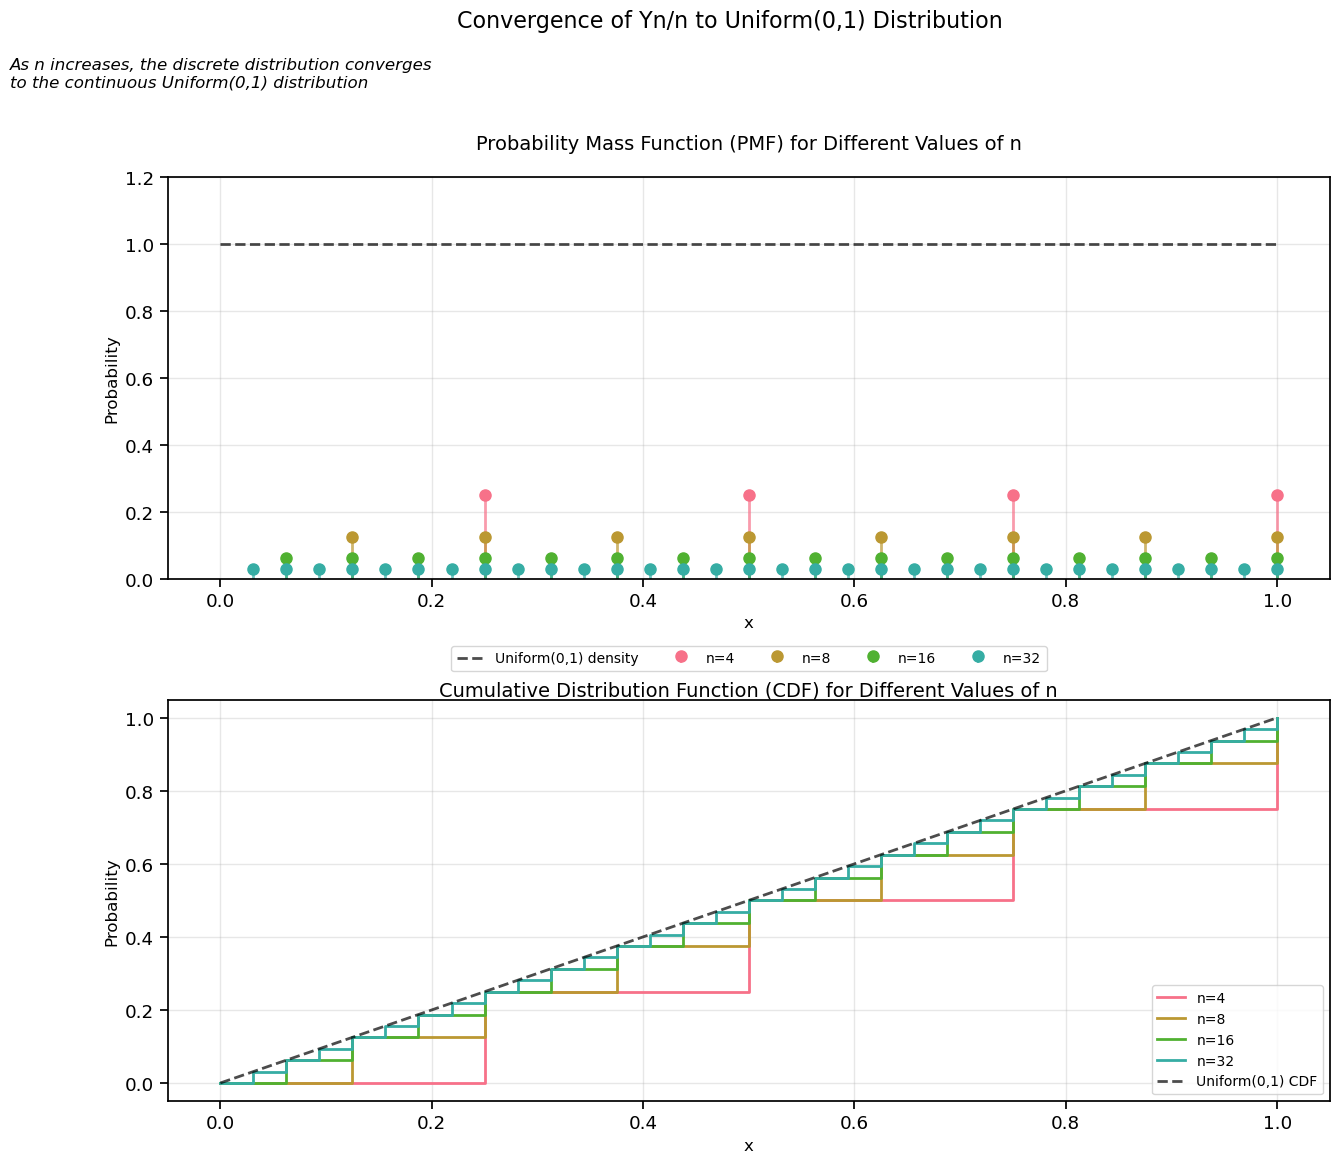

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Set style for better visualization
sns.set_context("notebook", font_scale=1.2)
colors = sns.color_palette("husl", 4)

def create_distribution_plots(n_values):
    """
    Create plots showing PMF and CDF for different values of n, demonstrating
    convergence to uniform distribution
    
    Args:
        n_values: List of n values to plot
    """
    # Create figure with GridSpec for better control over subplot layout
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.3)
    
    # PMF Plot
    ax1 = fig.add_subplot(gs[0])
    for i, n in enumerate(n_values):
        x = np.arange(1, n + 1) / n
        pmf = np.ones(n) / n
        # Create stem plot without deprecated parameter
        markerline, stemlines, baseline = ax1.stem(
            x, pmf,
            label=f'n={n}',
            linefmt=f'C{i}-',
            markerfmt=f'C{i}o',
            basefmt=' '
        )
        plt.setp(markerline, markersize=8)
        plt.setp(stemlines, linewidth=2, alpha=0.7)
    
    # Add uniform density for comparison
    x_uniform = np.linspace(0, 1, 100)
    ax1.plot(x_uniform, np.ones_like(x_uniform), 'k--', 
            label='Uniform(0,1) density', alpha=0.7, linewidth=2)
    
    ax1.set_title('Probability Mass Function (PMF) for Different Values of n', 
                 fontsize=14, pad=20)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('Probability', fontsize=12)
    ax1.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15),
              ncol=len(n_values)+1)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1.2)
    
    # CDF Plot
    ax2 = fig.add_subplot(gs[1])
    for i, n in enumerate(n_values):
        x = np.arange(1, n + 1) / n
        cdf = np.arange(1, n + 1) / n
        # Add points at discontinuities
        ax2.step(np.concatenate(([0], x)), np.concatenate(([0], cdf)), 
                label=f'n={n}', where='post', color=f'C{i}', linewidth=2)
    
    # Add uniform CDF for comparison
    x_uniform = np.linspace(0, 1, 100)
    ax2.plot(x_uniform, x_uniform, 'k--', 
            label='Uniform(0,1) CDF', alpha=0.7, linewidth=2)
    
    ax2.set_title('Cumulative Distribution Function (CDF) for Different Values of n', 
                 fontsize=14, pad=0)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('Probability', fontsize=12)
    ax2.legend(fontsize=10, loc='lower right')
    ax2.grid(True, alpha=0.3)
    
    # Add explanatory text
    fig.text(0.02, 0.98, 
             'As n increases, the discrete distribution converges\n' + 
             'to the continuous Uniform(0,1) distribution',
             fontsize=12, style='italic', va='top')
    
    return fig

# Create plots with different values of n to show convergence
n_values = [4, 8, 16, 32]
fig = create_distribution_plots(n_values)

# Add overall title
fig.suptitle('Convergence of Yn/n to Uniform(0,1) Distribution', 
             fontsize=16, y=1.02)

plt.show()